In [43]:
from scipy.stats import ks_2samp
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [29]:
master = pd.read_csv("C:\\Users\Alec\Desktop\dndMLApproach\complete_dataset_features.csv")

In [30]:
anech = master[master['Label'] == 0]
esc = master[master['Label'] == 1]

In [31]:
escape = pd.read_csv("C:\\Users\Alec\Desktop\dndMLApproach\ESCAPEII_mfccs_d1_d2_normalized.csv")

In [37]:
escape_flat = np.array(escape.iloc[:,2:]).flatten()
anech_flat = np.array(anech.iloc[:,2:]).flatten()
esc_flat = np.array(esc.iloc[:, 2:]).flatten()

In [38]:
# Perform KS test
ks_statistic, p_value = ks_2samp(escape_flat, esc_flat)

print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

KS Statistic: 0.06149527354418444
P-Value: 0.0


In [39]:
ks_statistic, p_value = ks_2samp(escape_flat, anech_flat)

print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

KS Statistic: 0.036723792238659736
P-Value: 0.0


In [41]:
ks_statistic, p_value = ks_2samp(anech_flat, esc_flat)

print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

KS Statistic: 0.07948973339321119
P-Value: 0.0


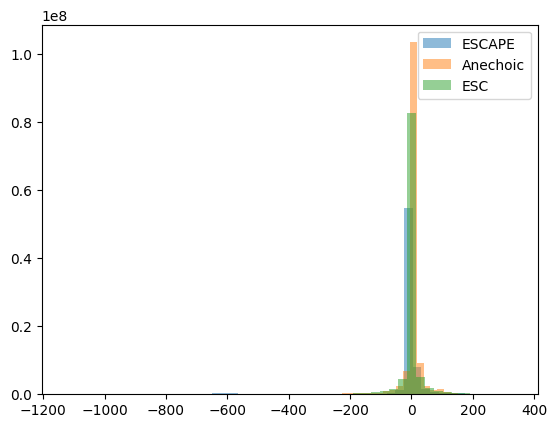

In [46]:
plt.hist(escape_flat, bins=50, alpha=0.5, label='ESCAPE')
plt.hist(anech_flat, bins=50, alpha=0.5, label='Anechoic')
plt.hist(esc_flat, bins=50, alpha=0.5, label='ESC')
plt.legend()
plt.show()

In [58]:
from sklearn.manifold import TSNE

# tsne = TSNE(n_components=3)
# tsne_train = tsne.fit_transform(np.array(anech.iloc[:,2:]).T)
# tsne_realworld = tsne.fit_transform(np.array(esc.iloc[:,2:]).T)

plt.scatter(tsne_train[:, 0], tsne_train[:, 1], label='anech', alpha=0.5)
plt.scatter(tsne_realworld[:, 0], tsne_realworld[:, 1], label='ESC50', alpha=0.5)
plt.legend()
plt.show()

C:\Users\Alec\.conda\envs\slopeWork\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


ValueError: need at least one array to concatenate

<Figure size 640x480 with 1 Axes>

In [173]:
esc50mfccs.shape

(30000, 3390)

In [174]:
combined.shape

(69256, 3390)

In [172]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

anechmfccs = anech.iloc[:,2:3392]
escapemfccs = escape.iloc[:,2:3392]
esc50mfccs = esc.iloc[:,2:3392]
combined = np.array(pd.concat([anechmfccs, esc50mfccs], axis=0))
scaler = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()
scaler.fit(combined.reshape(-1, combined.shape[-1]))
robust.fit(combined.reshape(-1, combined.shape[-1]))
minmax.fit(combined.reshape(-1, combined.shape[-1]))

MinMaxScaler()

In [176]:
def scale_features(features, scaler, robust, minmax):
    features = np.array(features)
    features_flat = features.reshape(-1, features.shape[-1])
    scaled_features_flat = scaler.transform(features_flat)
    scaled_features_flat = minmax.transform(scaled_features_flat)
    scaled_features_flat = robust.transform(scaled_features_flat)
    return scaled_features_flat.reshape(features.shape)

In [177]:
scaledAnech = scale_features(anechmfccs, scaler, robust, minmax)
scaledEscape = scale_features(escapemfccs, scaler, robust, minmax)
scaledESC50 = scale_features(esc50mfccs, scaler, robust, minmax)

In [178]:
escape_mfccs_flat = np.array(scaledEscape).flatten()
anech_mfccs_flat = np.array(scaledAnech).flatten()
esc50_mfccs_flat = np.array(scaledESC50).flatten()

In [179]:
# Perform KS test
ks_statistic, p_value = ks_2samp(escape_mfccs_flat, esc50_mfccs_flat)

print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

KS Statistic: 0.009021458598639176
P-Value: 0.0


In [180]:
# Perform KS test
ks_statistic, p_value = ks_2samp(escape_mfccs_flat, anech_mfccs_flat)

print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

KS Statistic: 0.0027282756526083585
P-Value: 1.4768536393326616e-296


In [181]:
# Perform KS test
ks_statistic, p_value = ks_2samp(esc50_mfccs_flat, anech_mfccs_flat)

print(f"KS Statistic: {ks_statistic}")
print(f"P-Value: {p_value}")

KS Statistic: 0.007119779679822469
P-Value: 0.0


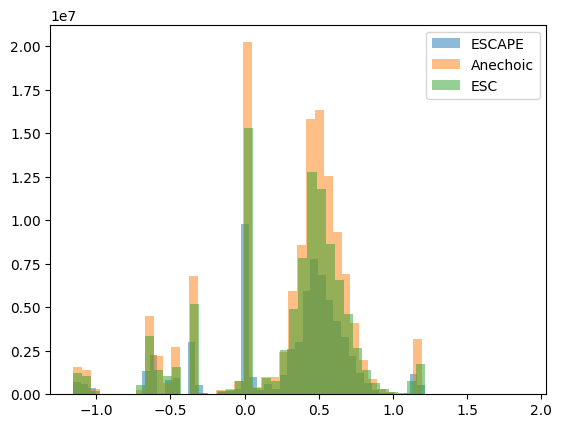

In [182]:
plt.hist(escape_mfccs_flat, bins=50, alpha=0.5, label='ESCAPE')
plt.hist(anech_mfccs_flat, bins=50, alpha=0.5, label='Anechoic')
plt.hist(esc50_mfccs_flat, bins=50, alpha=0.5, label='ESC')
plt.legend()
plt.show()

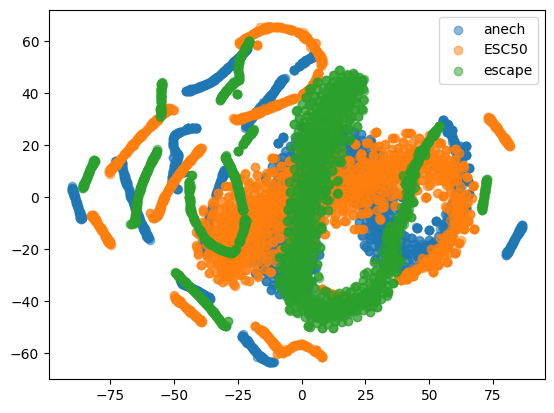

In [183]:
tsne = TSNE(n_components=2)
tsne_train = tsne.fit_transform(np.array(scaledAnech).T)
tsne_realworld = tsne.fit_transform(np.array(scaledESC50).T)
tsne_escape = tsne.fit_transform(np.array(scaledEscape).T)

plt.scatter(tsne_train[:, 0], tsne_train[:, 1], label='anech', alpha=0.5)
plt.scatter(tsne_realworld[:, 0], tsne_realworld[:, 1], label='ESC50', alpha=0.5)
plt.scatter(tsne_escape[:, 0], tsne_escape[:, 1], label='escape', alpha=0.5)
plt.legend()
plt.show()

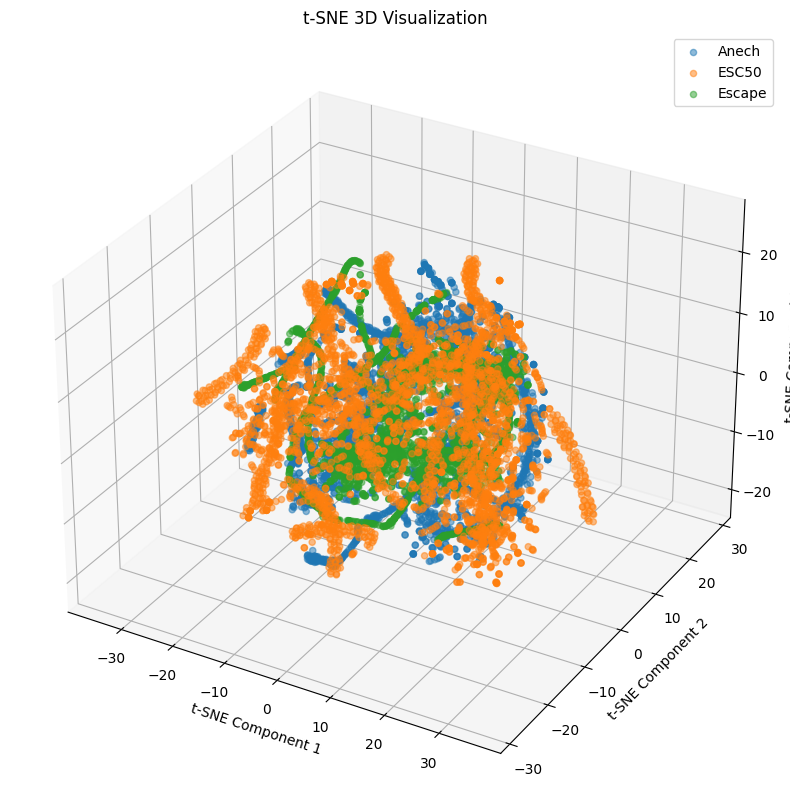

In [184]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming scaledAnech, scaledESC50, and scaledEscape are your scaled feature arrays
# Perform t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42)  # Use random_state for reproducibility

tsne_train = tsne.fit_transform(np.array(scaledAnech).T)
tsne_realworld = tsne.fit_transform(np.array(scaledESC50).T)
tsne_escape = tsne.fit_transform(np.array(scaledEscape).T)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting each dataset
ax.scatter(tsne_train[:, 0], tsne_train[:, 1], tsne_train[:, 2], label='Anech', alpha=0.5)
ax.scatter(tsne_realworld[:, 0], tsne_realworld[:, 1], tsne_realworld[:, 2], label='ESC50', alpha=0.5)
ax.scatter(tsne_escape[:, 0], tsne_escape[:, 1], tsne_escape[:, 2], label='Escape', alpha=0.5)

# Labeling the plot
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE 3D Visualization')

# Add a legend
ax.legend()

plt.show()